In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)
df = pd.read_csv('TWF_Futures_Minute_Trade.txt')
df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df.index.map(lambda x: x.hour)
df.columns = ['date', 'time', 'open', 'high', 'low','close','volume','hour']
df.head()

,date,time,open,high,low,close,volume,hour
2010-01-04 08:46:00,2010/1/4,08:46:00,8203.0,8208.0,8184.0,8187.0,1108,8
2010-01-04 08:47:00,2010/1/4,08:47:00,8187.0,8195.0,8186.0,8193.0,429,8
2010-01-04 08:48:00,2010/1/4,08:48:00,8194.0,8201.0,8193.0,8200.0,419,8
2010-01-04 08:49:00,2010/1/4,08:49:00,8200.0,8203.0,8198.0,8200.0,295,8
2010-01-04 08:50:00,2010/1/4,08:50:00,8200.0,8201.0,8195.0,8197.0,187,8


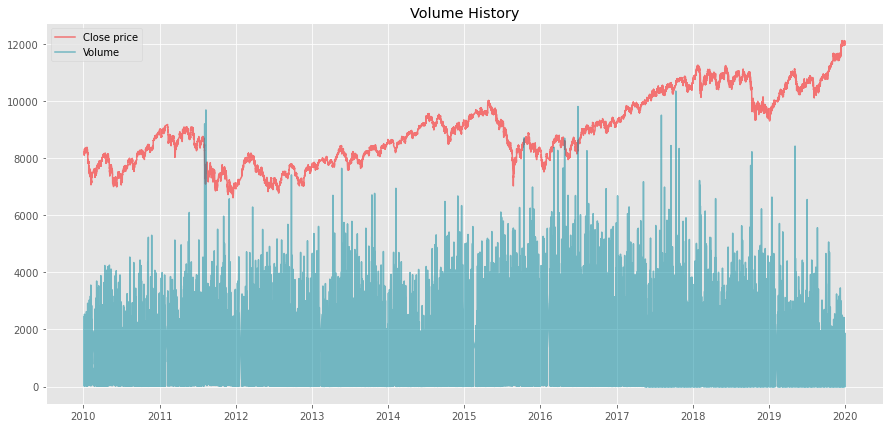

In [2]:
plt.figure(figsize = (15,7))
plt.plot(df['close'], color = 'red', alpha = 0.5 , label = 'Close price') #alpha=顏色深度
plt.plot(df['volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend(loc='upper left')
plt.title('Volume History');

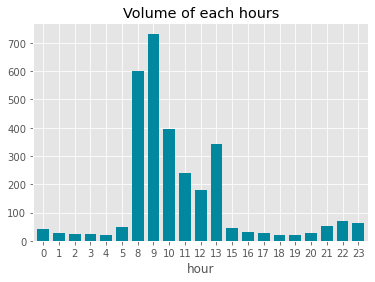

In [3]:
data = df[(df.index >= '2017-05-15 00:00:00')].copy()
#plt.figure(figsize = (12,5)) #(長,高，單位=inches)
data.groupby(['hour'])['volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation = 0) #擺正
plt.title('Volume of each hours');

In [4]:
Morning = df[(df['hour'] >= 8) & (df['hour'] <= 13)]
Morning.index += dt.timedelta(minutes=15) # 往前調整15mins
Morning.tail(20)

,date,time,open,high,low,close,volume,hour
2019-12-31 13:41:00,2019/12/31,13:26:00,12017.0,12024.0,12005.0,12008.0,1431,13
2019-12-31 13:42:00,2019/12/31,13:27:00,12008.0,12009.0,12002.0,12004.0,566,13
2019-12-31 13:43:00,2019/12/31,13:28:00,12003.0,12007.0,12002.0,12004.0,521,13
2019-12-31 13:44:00,2019/12/31,13:29:00,12004.0,12006.0,12003.0,12005.0,120,13
2019-12-31 13:45:00,2019/12/31,13:30:00,12005.0,12006.0,12002.0,12003.0,610,13
2019-12-31 13:46:00,2019/12/31,13:31:00,12003.0,12007.0,12002.0,12003.0,750,13
2019-12-31 13:47:00,2019/12/31,13:32:00,12003.0,12004.0,12002.0,12003.0,277,13
2019-12-31 13:48:00,2019/12/31,13:33:00,12002.0,12003.0,12000.0,12000.0,440,13
2019-12-31 13:49:00,2019/12/31,13:34:00,12000.0,12002.0,12000.0,12000.0,321,13
2019-12-31 13:50:00,2019/12/31,13:35:00,12000.0,12001.0,11997.0,11998.0,649,13


In [5]:
rule = '3T' #三個時間單位
Morning.resample(rule=rule, closed='right', label='right').first()[['open']].iloc[0:3]

,open
2010-01-04 09:03:00,8203.0
2010-01-04 09:06:00,8200.0
2010-01-04 09:09:00,8197.0


In [6]:
rule = '60T'
Morning = df[(df['hour'] >= 8) & (df['hour'] <= 13)]
Morning.index = Morning.index + dt.timedelta(minutes=15)

d1 = Morning.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Morning.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Morning.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Morning.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Morning.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Morning = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Morning = df_Morning.dropna()
df_Morning.index = df_Morning.index - dt.timedelta(minutes=15)
df_Morning.tail()

,open,high,low,close,volume
2019-12-31 08:45:00,12029.0,12049.0,11994.0,12030.0,31900
2019-12-31 09:45:00,12030.0,12035.0,12008.0,12027.0,15240
2019-12-31 10:45:00,12027.0,12038.0,12020.0,12030.0,6433
2019-12-31 11:45:00,12029.0,12031.0,12008.0,12009.0,6849
2019-12-31 12:45:00,12010.0,12024.0,11992.0,11995.0,13919


In [7]:
rule = '60T'

Night = df[(df['hour'] < 8) | (df['hour'] > 13)]

d1 = Night.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Night.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Night.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Night.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Night.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Night = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Night = df_Night.dropna()

In [8]:
df_Day = pd.concat([df_Morning, df_Night], axis=0) #先日再夜
df_Day = df_Day.sort_index(ascending=True) #按照時間
df_Day.head()

,open,high,low,close,volume
2010-01-04 08:45:00,8203.0,8211.0,8181.0,8187.0,17247
2010-01-04 09:45:00,8187.0,8188.0,8101.0,8165.0,31531
2010-01-04 10:45:00,8167.0,8180.0,8158.0,8172.0,8859
2010-01-04 11:45:00,8172.0,8207.0,8167.0,8197.0,12329
2010-01-04 12:45:00,8198.0,8200.0,8165.0,8166.0,13915


In [9]:
df_Morning['Hour'] = df_Morning.index.map(lambda x: x.hour)
df_Morning.head()

,open,high,low,close,volume,Hour
2010-01-04 08:45:00,8203.0,8211.0,8181.0,8187.0,17247,8
2010-01-04 09:45:00,8187.0,8188.0,8101.0,8165.0,31531,9
2010-01-04 10:45:00,8167.0,8180.0,8158.0,8172.0,8859,10
2010-01-04 11:45:00,8172.0,8207.0,8167.0,8197.0,12329,11
2010-01-04 12:45:00,8198.0,8200.0,8165.0,8166.0,13915,12


In [10]:
trainData = df_Morning[(df_Morning.index >= '2011-01-01 00:00:00') & (df_Morning.index <= '2018-12-31 00:00:00')].copy()
testData = df_Morning[(df_Morning.index >= '2019-1-1 00:00:00')].copy()

In [11]:
settlementDate_ = pd.read_csv('settlementDate.csv') #, encoding = 'ANSI'
settlementDate_.columns = ['settlementDate', 'futures', 'settlementPrice']
settlementDate_.head()

,settlementDate,futures,settlementPrice
0,2022/08/03,202208W1,14707
1,2022/07/27,202207W4,14887
2,2022/07/20,202207,14713
3,2022/07/13,202207W2,14384
4,2022/07/06,202207W1,14015


In [12]:
bool_ = [False if 'W' in i else True for i in settlementDate_['futures']] # if第三周->true, else: false
settlementDate = [pd.to_datetime(i).date() for i in list(settlementDate_[bool_]['settlementDate'])] #擷取第三個禮拜的日期資料
settlementDate[0:10]

[datetime.date(2022, 7, 20),
 datetime.date(2022, 6, 15),
 datetime.date(2022, 5, 18),
 datetime.date(2022, 4, 20),
 datetime.date(2022, 3, 16),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 1, 19),
 datetime.date(2021, 12, 15),
 datetime.date(2021, 11, 17),
 datetime.date(2021, 10, 20)]

In [14]:
fund = 1000000
FEE = 600
LENGTH = 20
NUMSTD = 1.53
Kup = 0.04
Kdown= 0.04


In [15]:
trainData['MA'] = trainData['close'].rolling(window=LENGTH, center=False).mean()
trainData['STD'] = trainData['close'].rolling(window=LENGTH, center=False).std()
trainData['upLine'] = trainData['MA'] + NUMSTD*trainData['STD'] #布林通道上軌
trainData['downLine'] = trainData['MA'] - NUMSTD*trainData['STD'] #布林通道下軌
trainData.tail()

,open,high,low,close,volume,Hour,MA,STD,upLine,downLine
2018-12-28 08:45:00,9630.0,9660.0,9625.0,9644.0,31047,8,9549.65,77.077729,9667.578925,9431.721075
2018-12-28 09:45:00,9644.0,9666.0,9622.0,9658.0,25826,9,9552.00,79.717924,9673.968423,9430.031577
2018-12-28 10:45:00,9656.0,9661.0,9648.0,9656.0,9574,10,9554.15,81.996967,9679.605360,9428.694640
2018-12-28 11:45:00,9657.0,9671.0,9654.0,9669.0,8113,11,9556.90,84.977954,9686.916269,9426.883731
2018-12-28 12:45:00,9669.0,9680.0,9660.0,9671.0,18247,12,9559.45,87.692930,9693.620183,9425.279817


In [16]:
df_arr = np.array(trainData) # 數據
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr] # datetime.date(2011, 2, 8)

In [17]:
#做多

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

# run過所有的過往資料
for i in range(len(time_arr)):
    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    ### 當收盤價突破布林上軌
    entryLong = df_arr[i,3] > df_arr[i,8]
    ### 結算日不進場
    entryCondition = date_arr[i] not in settlementDate

    ## 出場邏輯
    ### 當收盤價跌破布林下軌
    exitShort = df_arr[i,3] < df_arr[i,9]
    ### 結算日時放到結算
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    if BS == 'B':
        stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-Kdown) #比進場價格少了4%
        stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+Kup) #比進場價格多了4%

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        if entryLong and entryCondition:
            BS = 'B'
            t = i+1 #下一期再買
            buy.append(t) #紀錄進場時間
            # print("Buy Price: {}, time: {}".format(df_arr[t,0], time_arr[t]))

    elif BS == 'B':
        profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) #單一期的損益
        profit_list.append(profit)
        if exitShort or exitCondition or stopLoss or stopProfit or i == len(df_arr)-2 :
            #計算已實現損益
            pl_round = 200 * (df_arr[i+1,0] - df_arr[t,0]) #下一期的一開始才結束交易，計算總損益
            profit_fee = profit - FEE*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)

            #重置交易狀態
            BS = None
            # print("Sell Price: {}, time: {}".format(df_arr[i+1,0], time_arr[i+1]))
            # print("========Trade completed========")
            # print()


            # Realized PnL
            profit_fee_realized = pl_round - FEE*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee);

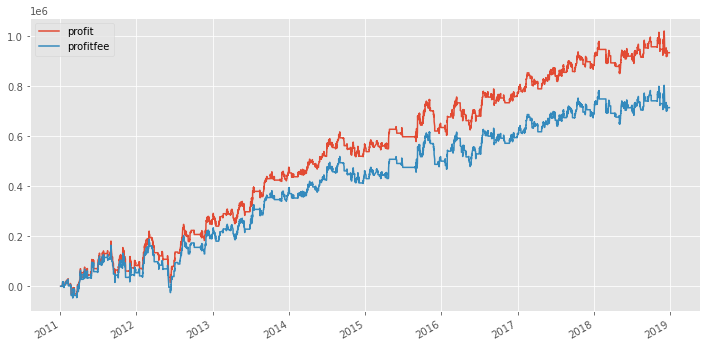

In [18]:
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6));

In [ ]:
,mn

In [17]:
trainData.tail()

,open,high,low,close,volume,Hour,MA,STD,upLine,downLine
2018-12-28 08:45:00,9630.0,9660.0,9625.0,9644.0,31047,8,9549.65,77.077729,9667.578925,9431.721075
2018-12-28 09:45:00,9644.0,9666.0,9622.0,9658.0,25826,9,9552.00,79.717924,9673.968423,9430.031577
2018-12-28 10:45:00,9656.0,9661.0,9648.0,9656.0,9574,10,9554.15,81.996967,9679.605360,9428.694640
2018-12-28 11:45:00,9657.0,9671.0,9654.0,9669.0,8113,11,9556.90,84.977954,9686.916269,9426.883731
2018-12-28 12:45:00,9669.0,9680.0,9660.0,9671.0,18247,12,9559.45,87.692930,9693.620183,9425.279817


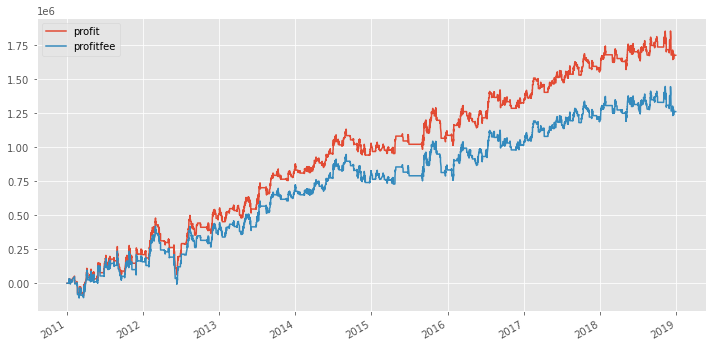

In [21]:
# 加碼，但只有加一次
BS = None
Position = 0
buy_price = 0
add_price = 0
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr)-1:
        break

    entryLong = df_arr[i,3] > df_arr[i,8]  # 收盤價>布林上軌，記得要是隔一天
    entryCondition = date_arr[i] not in settlementDate  # 結算日不進場
    exitShort = df_arr[i,3] <= df_arr[i,9]
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11 #要在結算日再賣出

    if BS == 'B':
        stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-Kdown)
        stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+Kup)
        add_condition = df_arr[i, 0] > buy_price

    if (BS == None) & (Position == 0):
        profit_list.append(0)
        profit_fee_list.append(0)
        if entryLong and entryCondition:
            BS = 'B'
            Position = 1
            t = i+1 # t = 隔一天買進時，紀錄買入的時間點，只有剛進入的時候紀錄
            buy_price = df_arr[i+1, 0] # 成本價
            buy.append(t)

    elif BS == 'B':
        profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) * Position # 記錄每天賺多少
        profit_list.append(profit)

        #確認部位上限 & 加碼條件成立
        if (Position <= 1) & add_condition:
            Position += 1
            add_price = df_arr[i+1, 0]

        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
            pl_round = 200 * ((df_arr[i+1,0] - df_arr[t,0]) + (df_arr[i+1,0] - add_price))
            profit_fee = profit - FEE*2*Position  # FEE*2*Position是定值
            profit_fee_list.append(profit_fee)
            sell.append(i+1)

            # Realized PnL
            profit_fee_realized = pl_round - FEE*2*Position
            profit_fee_list_realized.append(profit_fee_realized)
            BS = None
            Position, buy_price, add_price = 0,0,0
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
equity.plot(grid=True, figsize=(12,6));

In [25]:
np.array(profit_fee_list_realized).sum()

37975200.0

## 做空

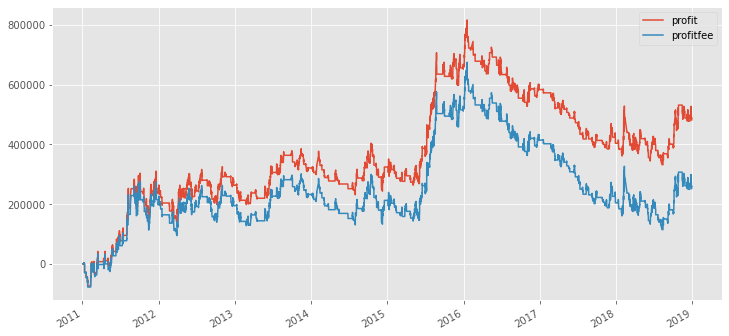

In [28]:
BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

# run過所有的過往資料
for i in range(len(time_arr)):
    if i == len(df_arr)-1:
        break

    entryShort = df_arr[i,3] < df_arr[i,9]
    entryCondition = date_arr[i] not in settlementDate
    exitLong = df_arr[i,3] > df_arr[i,8]
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    if BS == 'S':
        stopProfit = df_arr[i,3] <= df_arr[t,0] * (1-Kdown) #比進場價格少了4%
        stopLoss = df_arr[i,3] >= df_arr[t,0] * (1+Kup) #比進場價格多了4%

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        if entryShort and entryCondition:
            BS = 'S'
            t = i+1 
            buy.append(t)

    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0]) #單一期的損益
        profit_list.append(profit)
        if exitLong or exitCondition or stopLoss or stopProfit or i == len(df_arr)-2 :
            #計算已實現損益
            pl_round = 200 * ( df_arr[t,0]-df_arr[i+1,0]) #下一期的一開始才結束交易，計算總損益
            profit_fee = profit - FEE*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS = None
            profit_fee_realized = pl_round - FEE*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
equity.plot(grid=True, figsize=(12,6));

In [26]:
trainData.tail()

,open,high,low,close,volume,Hour,MA,STD,upLine,downLine
2018-12-28 08:45:00,9630.0,9660.0,9625.0,9644.0,31047,8,9549.65,77.077729,9667.578925,9431.721075
2018-12-28 09:45:00,9644.0,9666.0,9622.0,9658.0,25826,9,9552.00,79.717924,9673.968423,9430.031577
2018-12-28 10:45:00,9656.0,9661.0,9648.0,9656.0,9574,10,9554.15,81.996967,9679.605360,9428.694640
2018-12-28 11:45:00,9657.0,9671.0,9654.0,9669.0,8113,11,9556.90,84.977954,9686.916269,9426.883731
2018-12-28 12:45:00,9669.0,9680.0,9660.0,9671.0,18247,12,9559.45,87.692930,9693.620183,9425.279817


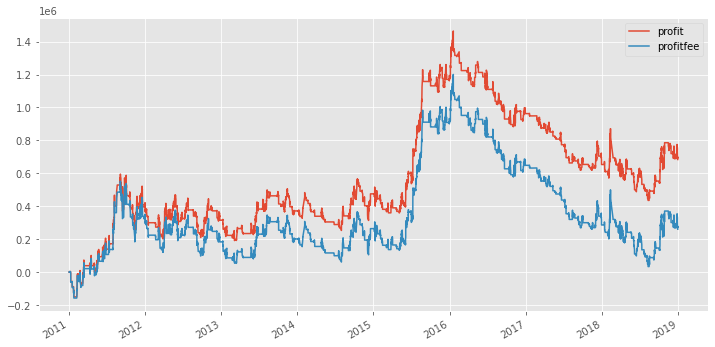

In [30]:
BS = None
Position = 0
buy_price = 0
add_price = 0
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr)-1:
        break

    entryShort = df_arr[i,3] < df_arr[i,9]
    entryCondition = date_arr[i] not in settlementDate
    exitLong = df_arr[i,3] > df_arr[i,8]
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    if BS == 'S':
        stopProfit = df_arr[i,3] <= df_arr[t,0] * (1-Kdown) #比進場價格少了4%
        stopLoss = df_arr[i,3] >= df_arr[t,0] * (1+Kup) #比進場價格多了4%
        add_condition = df_arr[i, 0] < buy_price #!!!
        
    if (BS == None) & (Position == 0):
        profit_list.append(0)
        profit_fee_list.append(0)
        if entryShort and entryCondition:
            BS = 'S'
            Position = 1
            t = i+1 # t = 隔一天買進時，紀錄買入的時間點，只有剛進入的時候紀錄
            buy_price = df_arr[i+1, 0] # 成本價
            buy.append(t)

    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0])* Position # 記錄每天賺多少
        profit_list.append(profit)

        #確認部位上限 & 加碼條件成立
        if (Position <= 1) & add_condition:
            Position += 1
            add_price = df_arr[i+1, 0]

        if exitLong or exitCondition or stopLoss or stopProfit or i == len(df_arr)-2 :
            pl_round = 200 * (( df_arr[t,0]-df_arr[i+1,0]) - (df_arr[i+1,0] - add_price))
            profit_fee = profit - FEE*2*Position  # FEE*2*Position是定值
            profit_fee_list.append(profit_fee)
            sell.append(i+1)

            # Realized PnL
            profit_fee_realized = pl_round - FEE*2*Position
            profit_fee_list_realized.append(profit_fee_realized)
            BS = None
            Position, buy_price, add_price = 0,0,0
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
equity.plot(grid=True, figsize=(12,6));

## 多空都做

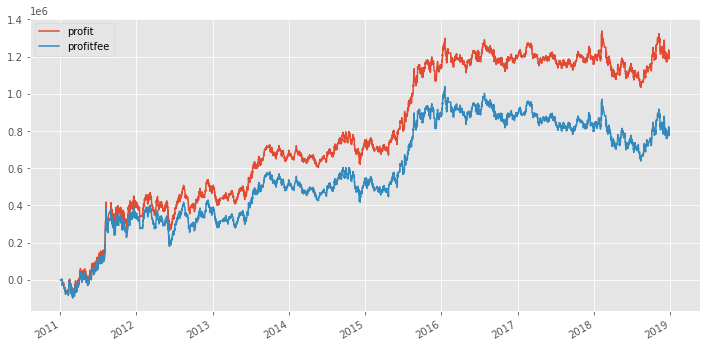

In [31]:
#做多

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(time_arr)):
    if i == len(df_arr)-1:
        break

    entryLong = df_arr[i,3] > df_arr[i,8]
    entryShort = df_arr[i,3] < df_arr[i,9]
    exitLong = df_arr[i,3] > df_arr[i,8]
    exitShort = df_arr[i,3] < df_arr[i,9]
    entryCondition = date_arr[i] not in settlementDate
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    if BS == 'B':
        stopLoss_B = df_arr[i,3] <= df_arr[t,0] * (1-Kdown)
        stopProfit_B = df_arr[i,3] >= df_arr[t,0] * (1+Kup)

    if BS == 'S':
        stopProfit_S = df_arr[i,3] <= df_arr[t,0] * (1-Kdown)
        stopLoss_S = df_arr[i,3] >= df_arr[t,0] * (1+Kup)

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        if entryLong and entryCondition:
            BS = 'B'
            t = i+1
            buy.append(t)
        elif entryShort and entryCondition:
            BS = 'S'
            t = i+1 
            buy.append(t)

            
            
            
    elif BS == 'B':
        profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) #單一期的損益
        profit_list.append(profit)
        if exitShort or exitCondition or stopLoss_B or stopProfit_B or i == len(df_arr)-2 :
            pl_round = 200 * (df_arr[i+1,0] - df_arr[t,0]) #下一期的一開始才結束交易，計算總損益
            profit_fee = profit - FEE*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS = None


            # Realized PnL
            profit_fee_realized = pl_round - FEE*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee);


    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0]) #單一期的損益
        profit_list.append(profit)
        if exitLong or exitCondition or stopLoss_S or stopProfit_S or i == len(df_arr)-2 :
            #計算已實現損益
            pl_round = 200 * ( df_arr[t,0]-df_arr[i+1,0]) #下一期的一開始才結束交易，計算總損益
            profit_fee = profit - FEE*2
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS = None
            profit_fee_realized = pl_round - FEE*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
equity.plot(grid=True, figsize=(12,6));